In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create DecisionTree Classifier
dt_clf = DecisionTreeClassifier(random_state=156)

# Loading Iris data from sklearn
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer,
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
import pandas as pd
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.tree import export_graphviz

# Create tree.dot file from out_file, which is created by export_graphviz()

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

### Call out branch node and leaf node

In [8]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Leaf node: where they do not have kids, and final label value is decided
# A node that goes beyond is called 'branch' which will be splited and create another leafs

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

#### Now let's look at feature importances

In [9]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

Feature importances:
[0.025 0.    0.555 0.42 ]


In [10]:
# Mapping importance by Features
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

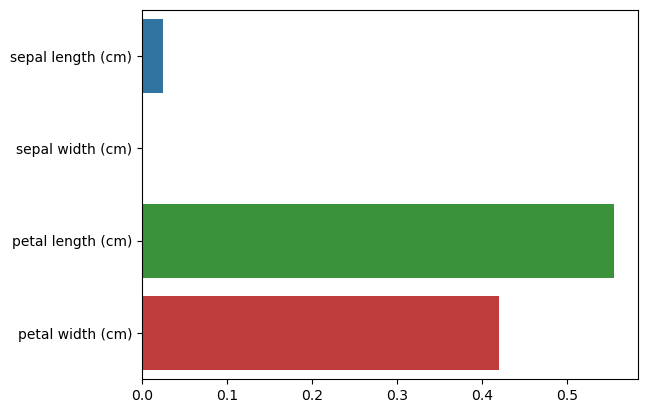

In [11]:
# Visualize Features by Columns
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### How to check overfitting

### What is Decision Boundary?
##### A decision boundary is the region of a problem space in which the output label of a classifier is ambiguous. If the decision surface is a hyperplane, then the classification problem is linear, and the classes are linearly separable. Decision boundaries are not always clear cut.

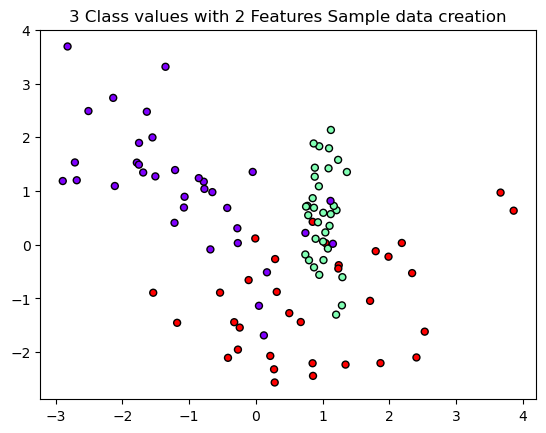

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# Using 2 features, 3 classes, and making into 2 dimensions

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# using scatter plot with 2 features in 2 dimensions and label color differently
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [13]:
import numpy as np

# Visualize Decision Boundary
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # Create Scatter Plot
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # Train
    model.fit(X, y)
    # msehgrid format
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # visualization using contours
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

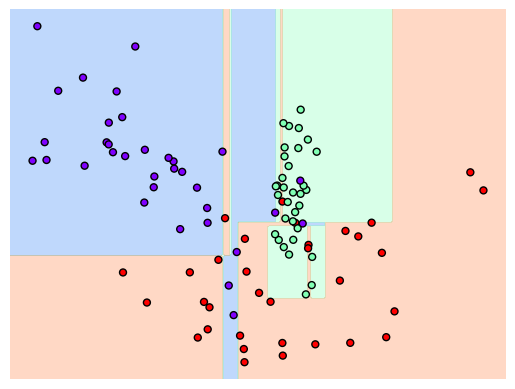

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Plot
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

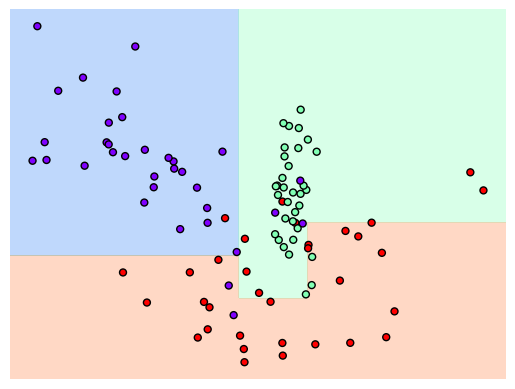

In [15]:
### As I said before how about I tune one of the parameters?
# min_samples_leaf=6 
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

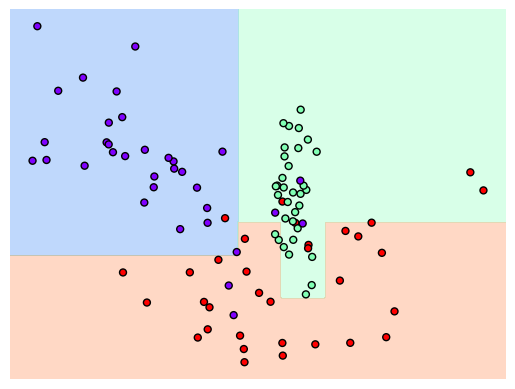

In [16]:
dt_clf = DecisionTreeClassifier( min_samples_leaf=5).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

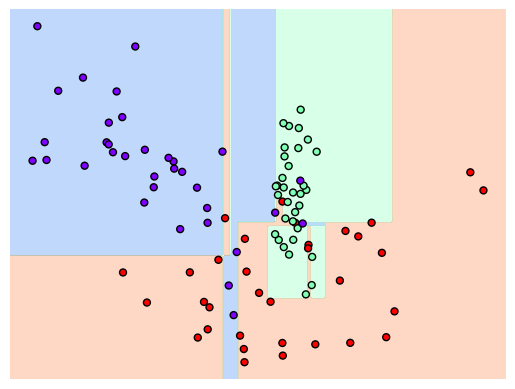

In [17]:
dt_clf = DecisionTreeClassifier( min_samples_leaf=1).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)